In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("player_season_stats_23-24_relevant.csv")
df

,league,season,team,player,nation,pos,age,MP Playing Time,Min Playing Time,90s Playing Time,...,Won% Aerial Duels,Fls Performance,Fld Performance,Att Pen Touches,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches,Def Pen Touches,Live Touches,Cmp Total
0,ENG-Premier League,2324,Arsenal,Aaron Ramsdale,ENG,GK,25,6,540,6.0,...,NaN,0,1,0,0,11,186,140,197,131
1,ENG-Premier League,2324,Arsenal,Ben White,ENG,DF,25,37,2988,33.2,...,62.1,19,12,64,676,1165,633,120,2456,1828
2,ENG-Premier League,2324,Arsenal,Bukayo Saka,ENG,FW,21,35,2919,32.4,...,39.0,41,69,271,1310,474,182,37,1946,1143
3,ENG-Premier League,2324,Arsenal,Cédric Soares,POR,DF,31,3,62,0.7,...,0.0,0,1,0,12,47,10,0,69,60
4,ENG-Premier League,2324,Arsenal,David Raya,ESP,GK,27,32,2880,32.0,...,83.3,0,4,0,0,39,1060,764,1099,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,ITA-Serie A,2324,Udinese,Sandi Lovrić,SVN,MF,25,29,1987,22.1,...,30.8,25,23,35,347,444,169,31,939,543
2848,ITA-Serie A,2324,Udinese,Simone Pafundi,ITA,MF,17,1,8,0.1,...,100.0,1,0,0,2,4,3,0,9,5
2849,ITA-Serie A,2324,Udinese,Thomas Kristensen,DEN,DF,21,26,2096,23.3,...,59.2,26,7,22,57,499,583,164,1124,662
2850,ITA-Serie A,2324,Udinese,Vivaldo Semedo,POR,FW,18,1,12,0.1,...,NaN,1,2,1,1,2,0,0,3,0


In [2]:
df.columns

Index(['league', 'season', 'team', 'player', 'nation', 'pos', 'age',
       'MP Playing Time', 'Min Playing Time', '90s Playing Time',
       'npxG Per 90 Minutes', 'G-PK Per 90 Minutes', 'xAG Per 90 Minutes',
       'xG+xAG Per 90 Minutes', 'Sh/90 Standard', 'SoT% Standard',
       'Dist Standard', 'G/Sh Standard', 'KP', 'PrgP', 'PPA', 'CrsPA', '1/3',
       'Cmp% Total', 'Cmp% Long', 'Att Long', 'TB Pass Types', 'Sw Pass Types',
       'Crs Pass Types', 'PrgC Carries', 'CPA Carries', 'Succ Take-Ons',
       'Succ% Take-Ons', 'Dis Carries', 'Mis Carries', 'PrgR Receiving',
       'TklW Tackles', 'Att 3rd Tackles', 'Mid 3rd Tackles', 'Def 3rd Tackles',
       'Int', 'Sh Blocks', 'Recov Performance', 'Won Aerial Duels',
       'Won% Aerial Duels', 'Fls Performance', 'Fld Performance',
       'Att Pen Touches', 'Att 3rd Touches', 'Mid 3rd Touches',
       'Def 3rd Touches', 'Def Pen Touches', 'Live Touches', 'Cmp Total'],
      dtype='object')

In [3]:
for col in df.columns:
    print(df[col].isnull().values.any(),len(df[df[col].isnull()==True]), col )

False 0 league
False 0 season
False 0 team
False 0 player
True 2 nation
False 0 pos
False 0 age
False 0 MP Playing Time
False 0 Min Playing Time
False 0 90s Playing Time
False 0 npxG Per 90 Minutes
False 0 G-PK Per 90 Minutes
False 0 xAG Per 90 Minutes
False 0 xG+xAG Per 90 Minutes
False 0 Sh/90 Standard
True 531 SoT% Standard
True 531 Dist Standard
True 531 G/Sh Standard
False 0 KP
False 0 PrgP
False 0 PPA
False 0 CrsPA
False 0 1/3
True 25 Cmp% Total
True 202 Cmp% Long
False 0 Att Long
False 0 TB Pass Types
False 0 Sw Pass Types
False 0 Crs Pass Types
False 0 PrgC Carries
False 0 CPA Carries
False 0 Succ Take-Ons
True 445 Succ% Take-Ons
False 0 Dis Carries
False 0 Mis Carries
False 0 PrgR Receiving
False 0 TklW Tackles
False 0 Att 3rd Tackles
False 0 Mid 3rd Tackles
False 0 Def 3rd Tackles
False 0 Int
False 0 Sh Blocks
False 0 Recov Performance
False 0 Won Aerial Duels
True 244 Won% Aerial Duels
False 0 Fls Performance
False 0 Fld Performance
False 0 Att Pen Touches
False 0 Att 3rd To

In [4]:
min90_col = "90s Playing Time"

core_features = [
    # Attacking & Shot Creation (per-90 stats)
    'npxG Per 90 Minutes',
    'G-PK Per 90 Minutes',
    'xAG Per 90 Minutes',
    'xG+xAG Per 90 Minutes',
    'Sh/90 Standard',
    'G/Sh Standard',
    # Progressive Passing (raw counts)
    'PrgP', 'KP', 'PPA', 'CrsPA',
    # Carries & Dribbling (raw counts)
    'PrgC Carries', 'CPA Carries', 'Succ Take-Ons',
    # Receiving (raw counts)
    'PrgR Receiving',
    # Defensive Actions (raw counts)
    'TklW Tackles', 'Int',
    # Aerial & Duels (raw counts)
    'Won Aerial Duels',
    # Discipline & Fouls (raw counts)
    'Fls Performance', 'Fld Performance',
    # Touches (raw counts)
    'Att 3rd Touches', 'Mid 3rd Touches', 'Def 3rd Touches'
]

per90_features = [
    'npxG Per 90 Minutes',
    'G-PK Per 90 Minutes',
    'xAG Per 90 Minutes',
    'xG+xAG Per 90 Minutes',
    'Sh/90 Standard',
    'G/Sh Standard'
]

raw_count_features = [col for col in core_features if col not in per90_features]


In the cells below: 

- Convert per-90 stats to raw totals

- Prepare the dataset for merging multiple rows per player

- Ensure later per-90 recalculation will be accurate

In [5]:
player_data = df.copy()

In [6]:
for col in per90_features:
    player_data[col + "_raw"] = player_data[col] * player_data[min90_col]

In [7]:
agg_dict = {
    "team": "first",
    "nation": "first",
    "pos": "first",
    "age": "mean",
    min90_col: "sum",
}

In [8]:
# sum all per-90 raw totals
for col in per90_features:
    agg_dict[col + "_raw"] = "sum"

# sum all raw count features
for col in raw_count_features:
    agg_dict[col] = "sum"


In [9]:
merged = player_data.groupby(["player"], as_index=False).agg(agg_dict)
merged

,player,team,nation,pos,age,90s Playing Time,npxG Per 90 Minutes_raw,G-PK Per 90 Minutes_raw,xAG Per 90 Minutes_raw,xG+xAG Per 90 Minutes_raw,...,Succ Take-Ons,PrgR Receiving,TklW Tackles,Int,Won Aerial Duels,Fls Performance,Fld Performance,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches
0,Aaron Cresswell,West Ham,ENG,"DF,FW",33.0,4.8,0.000,0.000,0.432,0.432,...,0,6,2,3,6,2,3,61,141,125
1,Aaron Hickey,Brentford,SCO,DF,21.0,7.9,0.237,0.000,0.079,0.316,...,5,13,9,3,1,10,16,76,155,132
2,Aaron Malouda,Lille,FRA,FW,17.0,0.0,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Ramsdale,Arsenal,ENG,GK,25.0,6.0,0.000,0.000,0.000,0.000,...,0,0,0,0,0,0,1,0,11,186
4,Aaron Ramsey,Burnley,ENG,"MF,FW",20.0,5.9,0.354,0.000,0.413,0.767,...,3,17,14,1,4,7,3,65,102,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,Ørjan Nyland,Sevilla,NOR,GK,32.0,24.0,0.000,0.000,0.480,0.480,...,0,1,0,0,10,0,2,0,4,841
2699,Đorđe Petrović,Chelsea,SRB,GK,23.0,22.1,0.000,0.000,0.000,0.000,...,0,0,0,0,5,0,1,0,3,852
2700,İlkay Gündoğan,Barcelona,GER,MF,32.0,33.3,5.661,3.996,10.323,17.649,...,34,116,22,21,7,15,42,841,1538,376
2701,Łukasz Fabiański,West Ham,POL,GK,38.0,8.0,0.000,0.000,0.000,0.000,...,0,0,0,1,2,0,0,0,5,255


In [10]:
time90 = merged[min90_col].replace(0, np.nan)  # avoid division by zero

for col in per90_features:
    merged[col] = merged[col + "_raw"] / time90

# Zero-minute players: set per-90 stats = 0
for col in per90_features:
    merged[col] = merged[col].fillna(0)

In [11]:
merged.columns

Index(['player', 'team', 'nation', 'pos', 'age', '90s Playing Time',
       'npxG Per 90 Minutes_raw', 'G-PK Per 90 Minutes_raw',
       'xAG Per 90 Minutes_raw', 'xG+xAG Per 90 Minutes_raw',
       'Sh/90 Standard_raw', 'G/Sh Standard_raw', 'PrgP', 'KP', 'PPA', 'CrsPA',
       'PrgC Carries', 'CPA Carries', 'Succ Take-Ons', 'PrgR Receiving',
       'TklW Tackles', 'Int', 'Won Aerial Duels', 'Fls Performance',
       'Fld Performance', 'Att 3rd Touches', 'Mid 3rd Touches',
       'Def 3rd Touches', 'npxG Per 90 Minutes', 'G-PK Per 90 Minutes',
       'xAG Per 90 Minutes', 'xG+xAG Per 90 Minutes', 'Sh/90 Standard',
       'G/Sh Standard'],
      dtype='object')

In [12]:
final_features = per90_features + raw_count_features

player_features = merged[["player", "team", "nation", "pos", "age", min90_col] + final_features]
player_features

,player,team,nation,pos,age,90s Playing Time,npxG Per 90 Minutes,G-PK Per 90 Minutes,xAG Per 90 Minutes,xG+xAG Per 90 Minutes,...,Succ Take-Ons,PrgR Receiving,TklW Tackles,Int,Won Aerial Duels,Fls Performance,Fld Performance,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches
0,Aaron Cresswell,West Ham,ENG,"DF,FW",33.0,4.8,0.00,0.00,0.09,0.09,...,0,6,2,3,6,2,3,61,141,125
1,Aaron Hickey,Brentford,SCO,DF,21.0,7.9,0.03,0.00,0.01,0.04,...,5,13,9,3,1,10,16,76,155,132
2,Aaron Malouda,Lille,FRA,FW,17.0,0.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Ramsdale,Arsenal,ENG,GK,25.0,6.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,1,0,11,186
4,Aaron Ramsey,Burnley,ENG,"MF,FW",20.0,5.9,0.06,0.00,0.07,0.13,...,3,17,14,1,4,7,3,65,102,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,Ørjan Nyland,Sevilla,NOR,GK,32.0,24.0,0.00,0.00,0.02,0.02,...,0,1,0,0,10,0,2,0,4,841
2699,Đorđe Petrović,Chelsea,SRB,GK,23.0,22.1,0.00,0.00,0.00,0.00,...,0,0,0,0,5,0,1,0,3,852
2700,İlkay Gündoğan,Barcelona,GER,MF,32.0,33.3,0.17,0.12,0.31,0.53,...,34,116,22,21,7,15,42,841,1538,376
2701,Łukasz Fabiański,West Ham,POL,GK,38.0,8.0,0.00,0.00,0.00,0.00,...,0,0,0,1,2,0,0,0,5,255


In [13]:
# Check no core data is missing
for col in player_features.columns:
    print(player_features[col].isna().values.any(), col)

False player
False team
True nation
False pos
False age
False 90s Playing Time
False npxG Per 90 Minutes
False G-PK Per 90 Minutes
False xAG Per 90 Minutes
False xG+xAG Per 90 Minutes
False Sh/90 Standard
False G/Sh Standard
False PrgP
False KP
False PPA
False CrsPA
False PrgC Carries
False CPA Carries
False Succ Take-Ons
False PrgR Receiving
False TklW Tackles
False Int
False Won Aerial Duels
False Fls Performance
False Fld Performance
False Att 3rd Touches
False Mid 3rd Touches
False Def 3rd Touches


In [14]:
player_features.describe()

,age,90s Playing Time,npxG Per 90 Minutes,G-PK Per 90 Minutes,xAG Per 90 Minutes,xG+xAG Per 90 Minutes,Sh/90 Standard,G/Sh Standard,PrgP,KP,...,Succ Take-Ons,PrgR Receiving,TklW Tackles,Int,Won Aerial Duels,Fls Performance,Fld Performance,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,...,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,25.092675,14.225564,0.121843,0.114772,0.092227,0.222499,1.260664,0.069962,49.456900,12.653718,...,10.454680,48.970033,12.848317,10.685905,17.902331,15.503145,14.772475,186.285609,355.692934,254.287458
std,4.627143,10.688132,0.190676,0.277854,0.181799,0.291424,1.513157,0.112845,52.772092,15.547900,...,13.730786,61.843953,12.710053,12.165287,22.730782,13.932662,15.236855,202.804761,354.751028,317.397052
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,4.200000,0.020000,0.000000,0.010000,0.050000,0.330000,0.000000,6.000000,1.000000,...,1.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,25.000000,53.500000,33.000000
50%,25.000000,13.400000,0.060000,0.000000,0.060000,0.140000,0.860000,0.000000,35.000000,7.000000,...,6.000000,24.000000,10.000000,6.000000,10.000000,13.000000,10.000000,119.000000,262.000000,129.000000
75%,28.000000,22.900000,0.170000,0.150000,0.130000,0.320000,1.890000,0.110000,75.000000,18.000000,...,15.000000,75.000000,20.000000,17.000000,24.000000,24.000000,23.000000,291.500000,551.500000,347.000000
max,40.000000,47.100000,4.550000,6.000000,6.850000,6.850000,36.000000,1.000000,441.000000,127.000000,...,124.000000,508.000000,76.000000,80.000000,221.000000,88.000000,108.000000,1312.000000,2662.000000,1985.000000


## Standardize feature values

In [15]:
import numpy as np

X = player_features[final_features].values
X

array([[0.000e+00, 0.000e+00, 9.000e-02, ..., 6.100e+01, 1.410e+02,
        1.250e+02],
       [3.000e-02, 0.000e+00, 1.000e-02, ..., 7.600e+01, 1.550e+02,
        1.320e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.700e-01, 1.200e-01, 3.100e-01, ..., 8.410e+02, 1.538e+03,
        3.760e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        2.550e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.000e+00,
        1.080e+03]])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.63912433, -0.41314265, -0.01225026, -0.45474434, -0.83328915,
        -0.62009307, -0.44457665, -0.49235809, -0.48320682, -0.60733432,
        -0.67793158, -0.53315744, -0.7615452 , -0.69494238, -0.85368045,
        -0.63190674, -0.52371858, -0.96935124, -0.77277451, -0.61787894,
        -0.60530525, -0.40741204],
       [-0.48176067, -0.41314265, -0.45237757, -0.62634718, -0.25161596,
        -0.62009307, -0.53934123, -0.74967517, -0.63275832, -0.60733432,
        -0.49628156, -0.44361879, -0.39733262, -0.58173333, -0.30283341,
        -0.63190674, -0.74372532, -0.39505465,  0.08057779, -0.54390249,
        -0.56583365, -0.38535356],
       [-0.63912433, -0.41314265, -0.50739349, -0.76362945, -0.83328915,
        -0.62009307, -0.93735247, -0.81400444, -0.78230982, -0.60733432,
        -0.8232516 , -0.53315744, -0.7615452 , -0.79197871, -1.01106532,
        -0.87855568, -0.78772666, -1.11292539, -0.96970196, -0.91871648,
        -1.00284064, -0.80131339],
       [-0.63912433

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# 1) Cosine similarity matrix
similarity_matrix = cosine_similarity(X_scaled)

sim_df = pd.DataFrame(
    similarity_matrix,
    index=player_features['player'],
    columns=player_features['player']
)

sim_df

player,Aaron Cresswell,Aaron Hickey,Aaron Malouda,Aaron Ramsdale,Aaron Ramsey,Aaron Seydel,Aaron Wan-Bissaka,Aarón Escandell,Aarón Martín,Abakar Sylla,...,Óscar Mingueza,Óscar Rodríguez Arnaiz,Óscar Trejo,Óscar Valentín,Óscar de Marcos,Ørjan Nyland,Đorđe Petrović,İlkay Gündoğan,Łukasz Fabiański,Łukasz Skorupski
player,,,,,,,,,,,,,,,,,,,,,
Aaron Cresswell,1.000000,0.856398,0.968323,0.968177,0.867606,0.516300,-0.238849,0.970726,-0.014360,-0.104942,...,-0.704973,-0.171838,-0.483629,-0.494643,-0.506120,0.787450,0.788640,-0.604762,0.961707,0.689703
Aaron Hickey,0.856398,1.000000,0.904077,0.903389,0.889466,0.410619,-0.284637,0.904261,-0.069857,-0.107265,...,-0.689793,-0.087731,-0.281304,-0.259212,-0.571512,0.698983,0.714837,-0.694230,0.886668,0.641621
Aaron Malouda,0.968323,0.904077,1.000000,0.987821,0.913796,0.553818,-0.309306,0.997419,-0.021977,-0.146602,...,-0.755097,-0.160517,-0.505318,-0.508489,-0.526626,0.760003,0.768000,-0.712598,0.976648,0.660559
Aaron Ramsdale,0.968177,0.903389,0.987821,1.000000,0.894703,0.517349,-0.291655,0.996353,-0.040396,-0.082431,...,-0.746600,-0.216943,-0.531384,-0.505406,-0.530325,0.849603,0.857295,-0.717866,0.997514,0.768740
Aaron Ramsey,0.867606,0.889466,0.913796,0.894703,1.000000,0.540419,-0.326844,0.908724,-0.132265,-0.153367,...,-0.766795,0.008729,-0.485793,-0.363290,-0.541103,0.663552,0.674054,-0.749378,0.880780,0.579091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ørjan Nyland,0.787450,0.698983,0.760003,0.849603,0.663552,0.378186,-0.185892,0.803972,-0.098546,0.149229,...,-0.604327,-0.363112,-0.559591,-0.424634,-0.463424,1.000000,0.997628,-0.621268,0.880316,0.982013
Đorđe Petrović,0.788640,0.714837,0.768000,0.857295,0.674054,0.345746,-0.176147,0.811840,-0.098972,0.153643,...,-0.600425,-0.367218,-0.553593,-0.417810,-0.451243,0.997628,1.000000,-0.628577,0.886843,0.985616
İlkay Gündoğan,-0.604762,-0.694230,-0.712598,-0.717866,-0.749378,-0.583080,0.285956,-0.718674,0.228131,-0.112940,...,0.821487,0.223125,0.607054,0.221586,0.476411,-0.621268,-0.628577,1.000000,-0.724952,-0.560455


In [18]:
threshold = 0.85

adj_matrix = similarity_matrix.copy()
adj_matrix[adj_matrix < threshold] = 0
np.fill_diagonal(adj_matrix, 0)


In [19]:
import networkx as nx

G = nx.from_numpy_array(adj_matrix)
# Add weights explicitly
for i in range(adj_matrix.shape[0]):
    for j in range(i+1, adj_matrix.shape[1]):
        if adj_matrix[i, j] > 0:
            G.add_edge(i, j, weight=adj_matrix[i, j])
adj_matrix

array([[0.        , 0.85639839, 0.96832267, ..., 0.        , 0.96170747,
        0.        ],
       [0.85639839, 0.        , 0.90407691, ..., 0.        , 0.88666827,
        0.        ],
       [0.96832267, 0.90407691, 0.        , ..., 0.        , 0.97664813,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.96170747, 0.88666827, 0.97664813, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
mapping = dict(zip(G.nodes, player_features["player"].tolist()))
G = nx.relabel_nodes(G, mapping)

In [21]:
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated)

In [22]:
player_clusters = player_features[player_features['player'].isin(list(G.nodes))]
player_clusters

,player,team,nation,pos,age,90s Playing Time,npxG Per 90 Minutes,G-PK Per 90 Minutes,xAG Per 90 Minutes,xG+xAG Per 90 Minutes,...,Succ Take-Ons,PrgR Receiving,TklW Tackles,Int,Won Aerial Duels,Fls Performance,Fld Performance,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches
0,Aaron Cresswell,West Ham,ENG,"DF,FW",33.0,4.8,0.00,0.00,0.09,0.09,...,0,6,2,3,6,2,3,61,141,125
1,Aaron Hickey,Brentford,SCO,DF,21.0,7.9,0.03,0.00,0.01,0.04,...,5,13,9,3,1,10,16,76,155,132
2,Aaron Malouda,Lille,FRA,FW,17.0,0.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Ramsdale,Arsenal,ENG,GK,25.0,6.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,1,0,11,186
4,Aaron Ramsey,Burnley,ENG,"MF,FW",20.0,5.9,0.06,0.00,0.07,0.13,...,3,17,14,1,4,7,3,65,102,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,Ørjan Nyland,Sevilla,NOR,GK,32.0,24.0,0.00,0.00,0.02,0.02,...,0,1,0,0,10,0,2,0,4,841
2699,Đorđe Petrović,Chelsea,SRB,GK,23.0,22.1,0.00,0.00,0.00,0.00,...,0,0,0,0,5,0,1,0,3,852
2700,İlkay Gündoğan,Barcelona,GER,MF,32.0,33.3,0.17,0.12,0.31,0.53,...,34,116,22,21,7,15,42,841,1538,376
2701,Łukasz Fabiański,West Ham,POL,GK,38.0,8.0,0.00,0.00,0.00,0.00,...,0,0,0,1,2,0,0,0,5,255


In [23]:
len(G.nodes)

2419

In [24]:
import community  
import random 
import numpy as np 

random.seed(30)
np.random.seed(30)

partition = community.best_partition(G, weight='weight')

player_clusters['cluster'] = player_clusters["player"].map(partition)

player_clusters



C:\Users\vasil\AppData\Local\Temp\ipykernel_5748\2378215256.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_clusters['cluster'] = player_clusters["player"].map(partition)


,player,team,nation,pos,age,90s Playing Time,npxG Per 90 Minutes,G-PK Per 90 Minutes,xAG Per 90 Minutes,xG+xAG Per 90 Minutes,...,PrgR Receiving,TklW Tackles,Int,Won Aerial Duels,Fls Performance,Fld Performance,Att 3rd Touches,Mid 3rd Touches,Def 3rd Touches,cluster
0,Aaron Cresswell,West Ham,ENG,"DF,FW",33.0,4.8,0.00,0.00,0.09,0.09,...,6,2,3,6,2,3,61,141,125,0
1,Aaron Hickey,Brentford,SCO,DF,21.0,7.9,0.03,0.00,0.01,0.04,...,13,9,3,1,10,16,76,155,132,0
2,Aaron Malouda,Lille,FRA,FW,17.0,0.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Ramsdale,Arsenal,ENG,GK,25.0,6.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1,0,11,186,0
4,Aaron Ramsey,Burnley,ENG,"MF,FW",20.0,5.9,0.06,0.00,0.07,0.13,...,17,14,1,4,7,3,65,102,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,Ørjan Nyland,Sevilla,NOR,GK,32.0,24.0,0.00,0.00,0.02,0.02,...,1,0,0,10,0,2,0,4,841,16
2699,Đorđe Petrović,Chelsea,SRB,GK,23.0,22.1,0.00,0.00,0.00,0.00,...,0,0,0,5,0,1,0,3,852,16
2700,İlkay Gündoğan,Barcelona,GER,MF,32.0,33.3,0.17,0.12,0.31,0.53,...,116,22,21,7,15,42,841,1538,376,5
2701,Łukasz Fabiański,West Ham,POL,GK,38.0,8.0,0.00,0.00,0.00,0.00,...,0,0,1,2,0,0,0,5,255,0


In [25]:
num_clusters = player_clusters['cluster'].nunique(dropna=True)
num_clusters


23

In [26]:
cluster_size = player_clusters.groupby('cluster')['player'].nunique()
cluster_size

cluster
0     581
1       3
2       2
3      20
4     346
5     801
6       2
7       2
8     286
9     242
10      3
11      2
12      2
13      5
14      2
15      2
16    105
17      2
18      2
19      3
20      2
21      2
22      2
Name: player, dtype: int64

In [27]:
# choose a threshold; e.g., clusters with at least 50 players
min_size = 100
big_clusters = cluster_size[cluster_size >= min_size].sort_values(ascending=False)
print("Big clusters:\n", big_clusters)

Big clusters:
 cluster
5     801
0     581
4     346
8     286
9     242
16    105
Name: player, dtype: int64


In [28]:
global_mean = player_clusters[final_features].mean() ### not for the clustering
global_mean 

npxG Per 90 Minutes        0.124269
G-PK Per 90 Minutes        0.117467
xAG Per 90 Minutes         0.090304
xG+xAG Per 90 Minutes      0.223242
Sh/90 Standard             1.264776
G/Sh Standard              0.069255
PrgP                      49.023563
KP                        12.476230
PPA                       10.335263
CrsPA                      2.684994
PrgC Carries              22.326581
CPA Carries                6.052501
Succ Take-Ons             10.343530
PrgR Receiving            48.179000
TklW Tackles              12.534518
Int                       10.660604
Won Aerial Duels          18.269119
Fls Performance           15.272013
Fld Performance           14.569243
Att 3rd Touches          182.587433
Mid 3rd Touches          353.562216
Def 3rd Touches          263.951633
dtype: float64

In [29]:
def get_cluster_signature(c, top_n=5):
    dfc = player_clusters[player_clusters['cluster'] == c]
    cluster_mean = dfc[final_features].mean()
    diff = (cluster_mean - global_mean).sort_values(ascending=False)
    return diff.head(top_n)


In [30]:
for i in list(big_clusters.index):
    print("Cluster: ", i)
    print(get_cluster_signature(i))
    print("-------------")

Cluster:  5
Mid 3rd Touches    266.282978
Att 3rd Touches    248.624802
PrgR Receiving      68.910888
PrgP                47.258584
PrgC Carries        29.974293
dtype: float64
-------------
Cluster:  0
xAG Per 90 Minutes      -0.063718
G/Sh Standard           -0.069255
npxG Per 90 Minutes     -0.110740
G-PK Per 90 Minutes     -0.117467
xG+xAG Per 90 Minutes   -0.182769
dtype: float64
-------------
Cluster:  4
Def 3rd Touches     419.432760
Mid 3rd Touches     363.845299
PrgP                 31.297246
Won Aerial Duels     30.236661
Int                  15.417431
dtype: float64
-------------
Cluster:  8
Sh/90 Standard           0.854968
G-PK Per 90 Minutes      0.349599
xG+xAG Per 90 Minutes    0.207455
npxG Per 90 Minutes      0.199546
G/Sh Standard            0.180704
dtype: float64
-------------
Cluster:  9
Sh/90 Standard           1.909717
xG+xAG Per 90 Minutes    0.203585
xAG Per 90 Minutes       0.119840
npxG Per 90 Minutes      0.082893
G/Sh Standard           -0.062793
dtype: fl

## Summary of Focus Clusters
| Cluster | Role Name                                          | Key Characteristics |
|---------|-----------------------------------------------------|----------------------|
| 5       | Advanced Zone Progression & Link-Up Midfielders     | High mid/att 3rd touches, strong PrgP + PrgR, connective AM/CM profiles |
| 0       | Low-Impact Attackers / Minimal Chance Contributors  | Below-average xAG, npxG, G/Sh; weak attacking involvement |
| 4       | Defensive Workhorses with Aerial Strength           | High defensive touches, strong aerial duels, interceptions, progressive passing |
| 8       | Efficient Finishers with Above-Average Shot Volume  | Good Sh/90, npxG, G/Sh; poacher-style attackers |
| 9       | High-Volume Shooters with Moderate Expected Value   | Very high Sh/90 but only moderate xG; speculative shooters |
| 16      | Deep Defenders with Minimal Attacking Threat        | Extremely high defensive-zone touches, negligible attacking metrics |


In [32]:
player_clusters.to_csv("players_w_clusters.csv", index=False)

### Visualizations

In [33]:
name_to_index = {
    row["player"]: i
    for i, row in player_features.iterrows()
}

In [34]:
name_to_cluster = dict(zip(player_clusters['player'], player_clusters['cluster']))

clusters = [name_to_cluster[node] for node in G.nodes()]

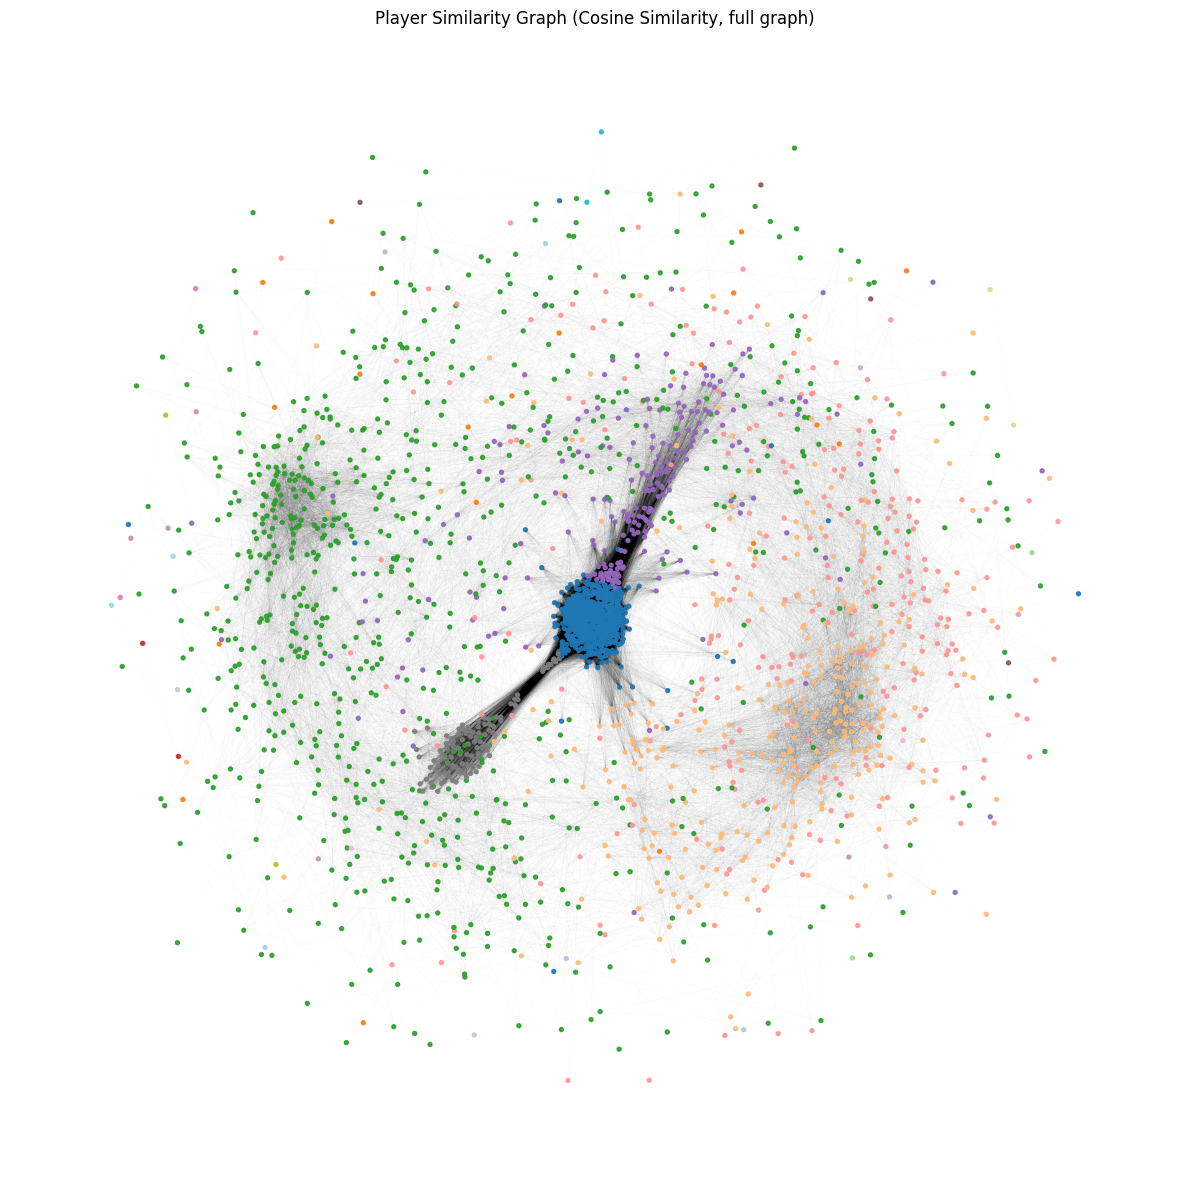

In [35]:
import matplotlib.pyplot as plt
import networkx as nx

H = G  # full similarity graph

nodes = list(H.nodes())

pos = nx.spring_layout(
    H,
    k=0.15,
    iterations=30,
    weight="weight",
    seed=42
)

plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(
    H,
    pos,
    nodelist=nodes,
    node_size=8,
    node_color=clusters,
    cmap="tab20",
    alpha=0.9
)

nx.draw_networkx_edges(
    H,
    pos,
    edgelist=H.edges(),
    width=0.1,
    alpha=0.08
)

plt.title("Player Similarity Graph (Cosine Similarity, full graph)")
plt.axis("off")
plt.tight_layout()
plt.savefig("Full_graph.png", dpi=300, bbox_inches="tight")
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np

# 1) Build feature matrix from current player_features
feature_matrix = player_features[final_features].values

# 2) Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_matrix)

# 3) UMAP to 2D
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

embedding = reducer.fit_transform(X_scaled)
print("Embedding shape:", embedding.shape)

c:\Users\vasil\anaconda3\envs\myenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Embedding shape: (2703, 2)


In [41]:
# Merge cluster labels from player_clusters into player_features
player_features = player_features.merge(
    player_clusters[['player', 'cluster']],
    on='player',
    how='left'
)

print("'cluster' column exists:", "cluster" in player_features.columns)

'cluster' column exists: True


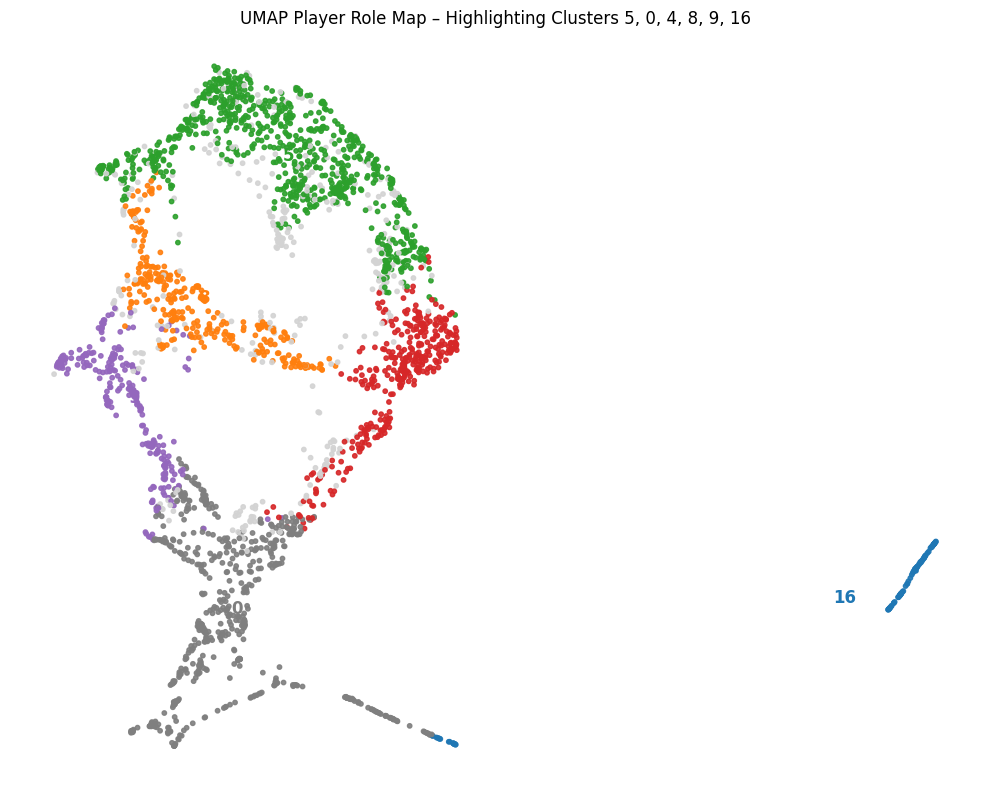

In [43]:
import numpy as np
import matplotlib.pyplot as plt

focus_clusters = [5, 0, 4, 8, 9, 16]

cluster_series = player_features["cluster"]

# base: everything grey
colors = np.full(len(cluster_series), "lightgrey", dtype=object)

# distinct colors for the 6 clusters
color_map = {
    5: "tab:green",
    0: "tab:gray",
    4: "tab:red",
    8: "tab:orange",
    9: "tab:purple",
    16: "tab:blue",
}

for c, col in color_map.items():
    colors[cluster_series == c] = col

plt.figure(figsize=(10, 8))
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors,
    s=10,
    alpha=0.9
)

for c in focus_clusters:
    mask = (cluster_series == c)
    if mask.sum() == 0:
        continue
    x_mean = embedding[mask, 0].mean()
    y_mean = embedding[mask, 1].mean()
    plt.text(
        x_mean,
        y_mean,
        str(c),
        fontsize=12,
        weight="bold",
        color=color_map[c]
    )

plt.title("UMAP Player Role Map – Highlighting Clusters 5, 0, 4, 8, 9, 16")
plt.axis("off")
plt.tight_layout()
plt.savefig("umap_clusters_6.png", dpi=300, bbox_inches="tight")
plt.show()

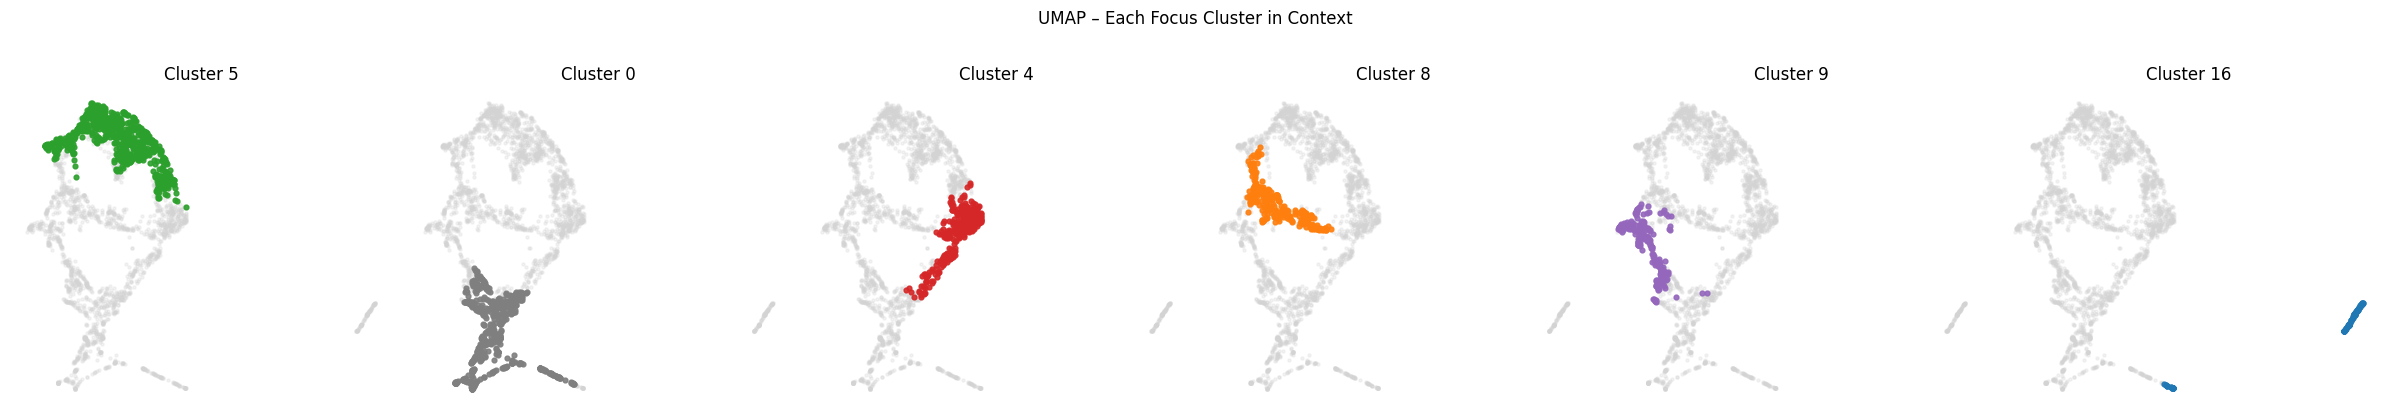

In [44]:
import matplotlib.pyplot as plt

# Make sure these are defined beforehand:
# embedding, cluster_series, focus_clusters, color_map

n_clusters = len(focus_clusters)

fig, axes = plt.subplots(1, n_clusters, figsize=(4 * n_clusters, 4), sharex=True, sharey=True)

# If there's only 1 cluster, axes is not an array, so normalize it:
if n_clusters == 1:
    axes = [axes]

for ax, c in zip(axes, focus_clusters):
    mask = (cluster_series == c)

    # background: all players light grey
    ax.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c="lightgrey",
        s=5,
        alpha=0.25
    )
    # this cluster highlighted
    ax.scatter(
        embedding[mask, 0],
        embedding[mask, 1],
        c=color_map[c],
        s=12,
        alpha=0.9
    )

    ax.set_title(f"Cluster {c}")
    ax.axis("off")

fig.suptitle("UMAP – Each Focus Cluster in Context", y=1.02)
plt.tight_layout()
plt.savefig("umap2.png", dpi=300, bbox_inches="tight")
plt.show()

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import os

def plot_cluster_graph(cluster_id, max_nodes=200, save=False, save_dir="cluster_plots"):
    # Create directory if needed
    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # players in cluster
    names = player_features[player_features["cluster"] == cluster_id]["player"].tolist()

    if len(names) < 2:
        print(f"Cluster {cluster_id} has <2 players — skipping plot.")
        return

    # subsample if too big
    if len(names) > max_nodes:
        random.seed(42)  # reproducible sampling
        names = random.sample(names, max_nodes)

    Hc = G.subgraph(names).copy()

    if Hc.number_of_nodes() == 0:
        print(f"Cluster {cluster_id}: subgraph has 0 nodes in G — skipping.")
        return

    # compute graph layout
    pos = nx.spring_layout(Hc, k=0.3, iterations=40, seed=42, weight="weight")

    plt.figure(figsize=(7, 7))

    nx.draw_networkx_nodes(
        Hc, pos,
        node_size=40,
        alpha=0.9,
        node_color=color_map.get(cluster_id, "tab:blue")
    )

    nx.draw_networkx_edges(
        Hc, pos,
        width=0.3,
        alpha=0.4
    )

    plt.title(f"Similarity Subgraph – Cluster {cluster_id}")
    plt.axis("off")

    if save:
        filename = f"{save_dir}/cluster_{cluster_id}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.1)
        print(f"Saved: {filename}")

    plt.show()


Saved: cluster_plots/cluster_5.png


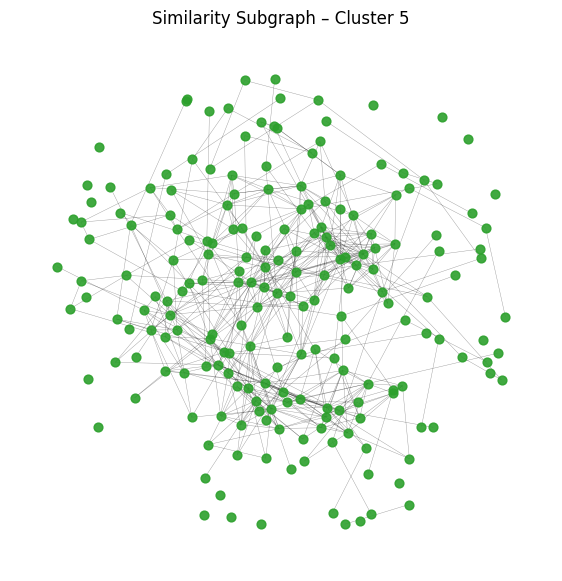

In [46]:
plot_cluster_graph(5, save=True)

Saved: cluster_plots/cluster_0.png


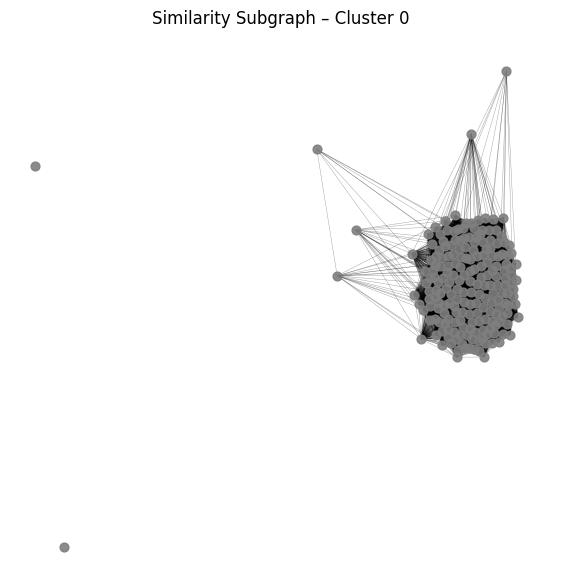

In [47]:
plot_cluster_graph(0, save=True)

Saved: cluster_plots/cluster_4.png


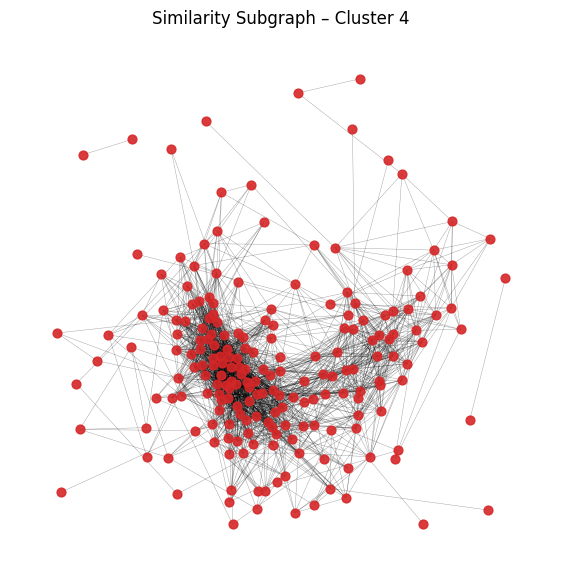

In [48]:
plot_cluster_graph(4, save=True)

Saved: cluster_plots/cluster_8.png


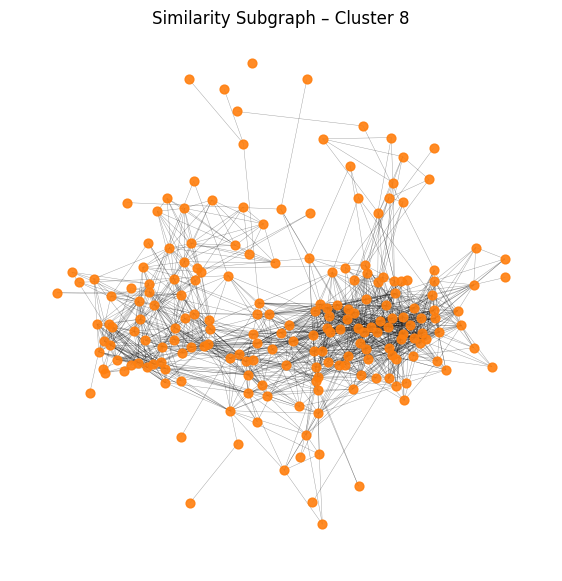

In [49]:
plot_cluster_graph(8, save=True)

Saved: cluster_plots/cluster_9.png


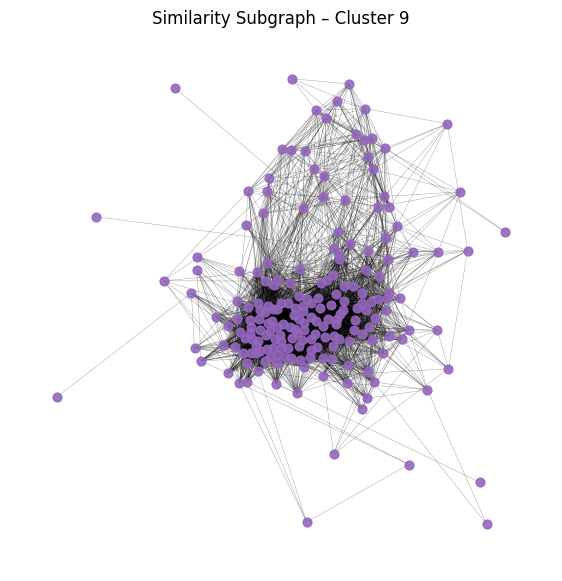

In [50]:
plot_cluster_graph(9, save=True)

Saved: cluster_plots/cluster_16.png


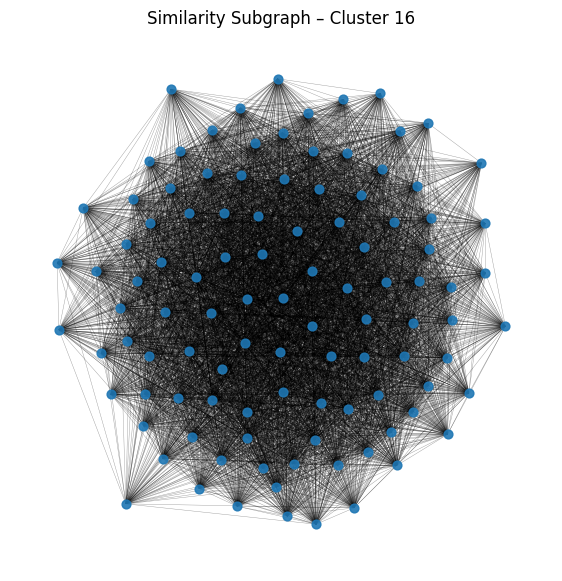

In [51]:
plot_cluster_graph(16, save=True)

In [54]:
import numpy as np

rep_players = {}

for c in focus_clusters:
    dfc = player_features[player_features["cluster"] == c]

    if len(dfc) == 0:
        print(f"Cluster {c} empty — skipped.")
        continue

    Xc = dfc[final_features].values

    centroid = Xc.mean(axis=0)
    dists = np.linalg.norm(Xc - centroid, axis=1)

    rep_idx = dists.argmin()
    rep_player = dfc.iloc[rep_idx]["player"]

    rep_players[c] = rep_player

rep_players


{5: 'Daler Kuzyaev',
 0: 'Calum Chambers',
 4: 'Miloš Veljković',
 8: 'Tom Louchet',
 9: 'Fábio Silva',
 16: 'Neto'}

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import random

def plot_ego_network(player_name, radius=1, save=False, save_dir="ego-networks-plots", max_labels=10):
    # Check if player exists in graph
    if player_name not in G:
        print(f"Player '{player_name}' not found in graph G.")
        return
    
    # Create folder if needed
    if save and not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Build ego graph
    ego = nx.ego_graph(G, player_name, radius=radius)

    if ego.number_of_nodes() == 0:
        print(f"Ego graph for '{player_name}' is empty.")
        return

    pos = nx.spring_layout(ego, k=0.3, iterations=40, seed=42, weight="weight")

    plt.figure(figsize=(7, 7))

    # Color: red = player, blue = neighbors
    node_colors = ["red" if n == player_name else "steelblue" for n in ego.nodes()]

    nx.draw_networkx_nodes(
        ego, pos,
        node_size=60,
        alpha=0.9,
        node_color=node_colors
    )

    nx.draw_networkx_edges(
        ego, pos,
        width=0.4,
        alpha=0.4
    )

    # Label center + up to max_labels neighbors
    labels = {player_name: player_name}
    neighbors = [n for n in ego.nodes() if n != player_name]

    if len(neighbors) > max_labels:
        random.seed(42)
        neighbors = random.sample(neighbors, max_labels)

    for n in neighbors:
        labels[n] = n

    nx.draw_networkx_labels(ego, pos, labels, font_size=7)

    plt.title(f"Ego Network – {player_name}")
    plt.axis("off")

    # Save the image
    if save:
        safe_name = player_name.replace(" ", "_").replace("/", "_")
        filename = os.path.join(save_dir, f"ego_{safe_name}.png")
        plt.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.1)
        print(f"Saved to: {filename}")

    plt.show()


Cluster 5 representative: Daler Kuzyaev
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Daler_Kuzyaev.png


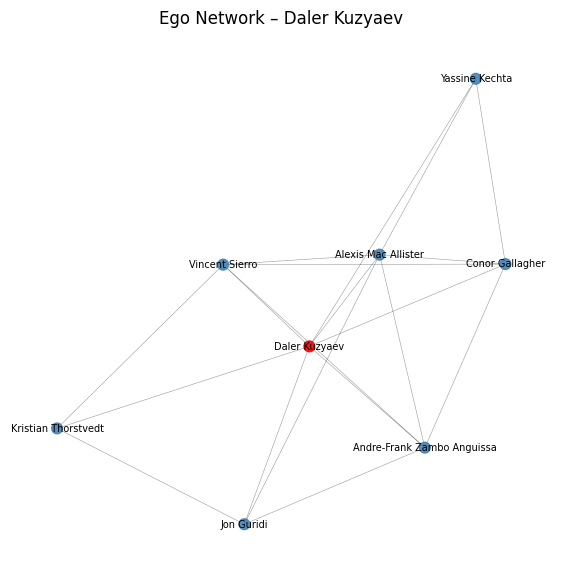

Cluster 0 representative: Calum Chambers
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Calum_Chambers.png


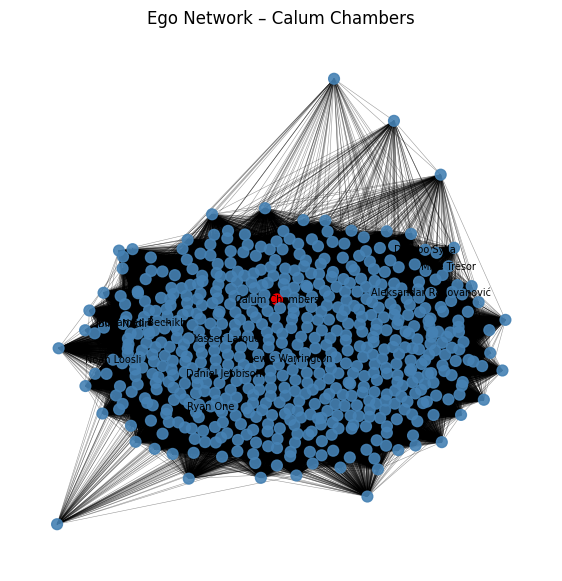

Cluster 4 representative: Miloš Veljković
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Miloš_Veljković.png


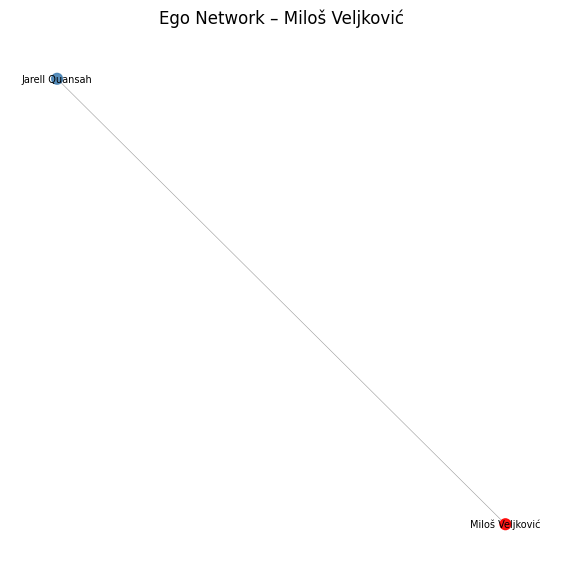

Cluster 8 representative: Tom Louchet
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Tom_Louchet.png


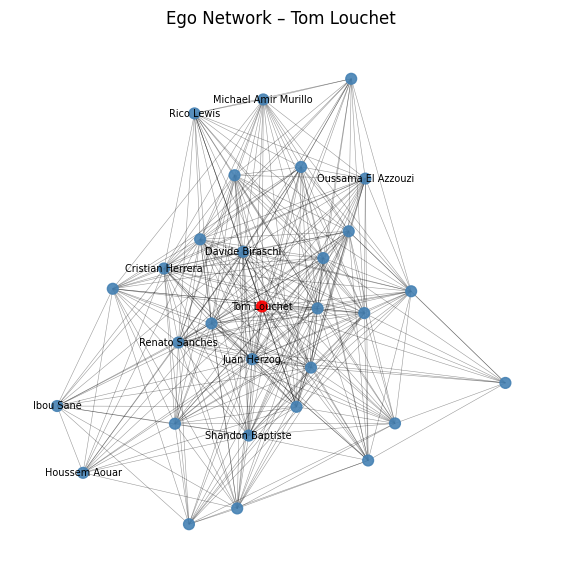

Cluster 9 representative: Fábio Silva
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Fábio_Silva.png


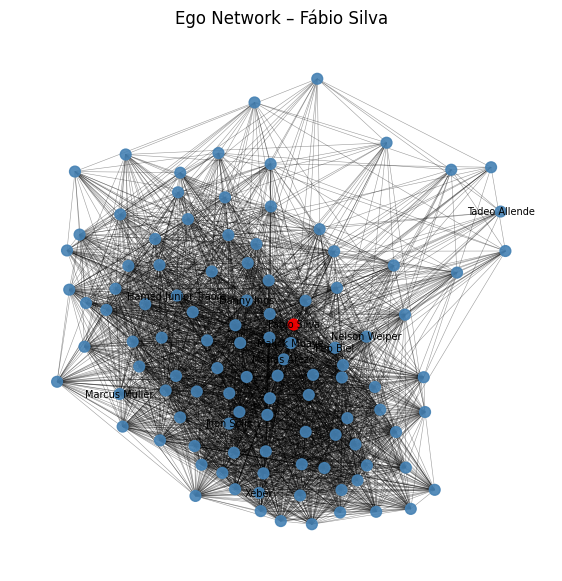

Cluster 16 representative: Neto
Saved to: C:\Users\vasil\Desktop\Msc\5th term\Computational Tools for Data Science\ego_Neto.png


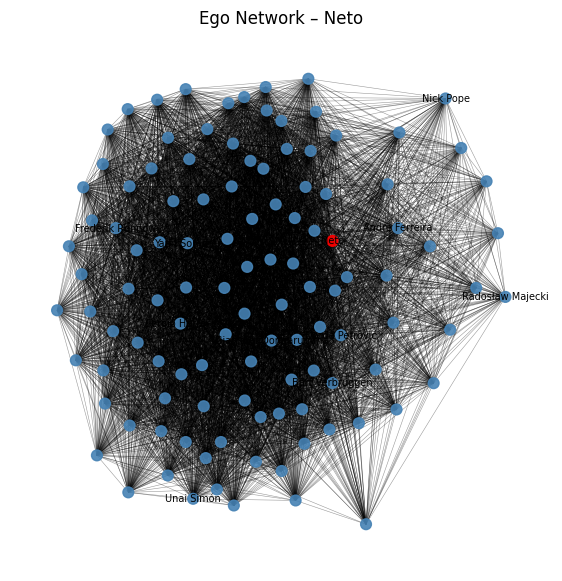

In [56]:
for c, p in rep_players.items():
    print(f"Cluster {c} representative: {p}")
    plot_ego_network(p, radius=1, save=True)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

centroids = []
for c in focus_clusters:
    dfc = player_features[player_features["cluster"] == c]
    centroids.append(dfc[final_features].mean().values)

centroids = np.vstack(centroids)

# cosine similarity between cluster centroids
C_sim = cosine_similarity(centroids)  # 5x5 matrix
C_sim

array([[1.        , 0.84098886, 0.82326054, 0.99411391, 0.98708058,
        0.32662287],
       [0.84098886, 1.        , 0.98220287, 0.88511412, 0.77567192,
        0.76036423],
       [0.82326054, 0.98220287, 1.        , 0.86339074, 0.73796836,
        0.69484745],
       [0.99411391, 0.88511412, 0.86339074, 1.        , 0.97702171,
        0.41145788],
       [0.98708058, 0.77567192, 0.73796836, 0.97702171, 1.        ,
        0.26386132],
       [0.32662287, 0.76036423, 0.69484745, 0.41145788, 0.26386132,
        1.        ]])

In [59]:
GC = nx.Graph()

# add nodes with labels
for c in focus_clusters:
    GC.add_node(c)

# add weighted edges between clusters (skip self-loops)
for i, ci in enumerate(focus_clusters):
    for j, cj in enumerate(focus_clusters):
        if j <= i:
            continue
        w = C_sim[i, j]
        GC.add_edge(ci, cj, weight=w)

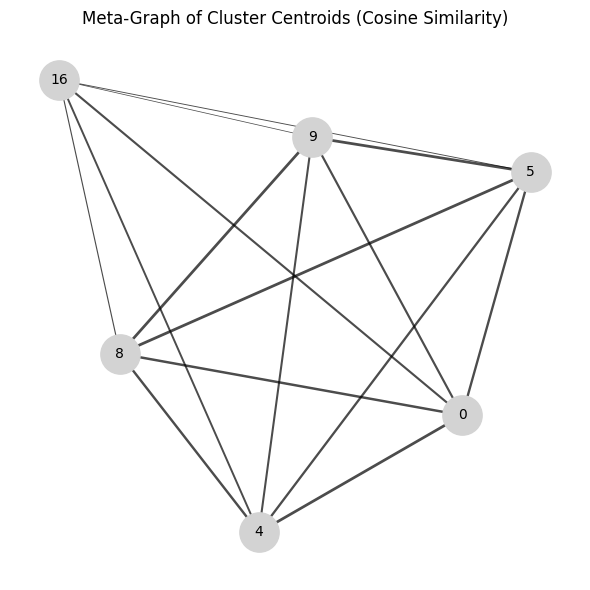

In [60]:
plt.figure(figsize=(6, 6))

pos = nx.spring_layout(GC, seed=42, weight="weight")

# edge widths proportional to similarity
weights = [GC[u][v]["weight"] for u, v in GC.edges()]
max_w = max(weights)
edge_widths = [2.0 * (w / max_w) for w in weights]

nx.draw_networkx_nodes(GC, pos, node_size=800, node_color="lightgrey")
nx.draw_networkx_edges(GC, pos, width=edge_widths, alpha=0.7)

# label nodes with cluster id (or persona name if you want)
labels = {c: str(c) for c in focus_clusters}
nx.draw_networkx_labels(GC, pos, labels, font_size=10)

plt.title("Meta-Graph of Cluster Centroids (Cosine Similarity)")
plt.axis("off")
plt.tight_layout()
plt.savefig("meta_graph.png")
plt.show()